# Chris Jupyter Notebook Movie Analysis

### Imports and File Read-ins 

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#file locations
directors_file = "files/imbd_files/directors.csv"
known_for_file= "files/imbd_files/known_for.csv"
movie_akas_file = "files/imbd_files/movie_akas.csv"
movie_basics_file = "files/imbd_files/movie_basics.csv"
movie_ratings_file= "files/imbd_files/movie_ratings.csv"
persons_file = "files/imbd_files/persons.csv"
principals_file= "files/imbd_files/principals.csv"
writers_file = "files/imbd_files/writers.csv"

# read files into dataframes
directors = pd.read_csv(directors_file)
known_for = pd.read_csv(known_for_file)
movie_akas = pd.read_csv(movie_akas_file)
movie_basics = pd.read_csv(movie_basics_file)
movie_ratings = pd.read_csv(movie_ratings_file)
persons = pd.read_csv(persons_file)
principals = pd.read_csv(principals_file)
writers = pd.read_csv(writers_file)

# list of tables for reference
IMBD_df_list = ['directors', 'known_for', 'movie_akas', 'movie_basics', 'movie_ratings', 'persons', 'principals', 'writers']

In [3]:
#List of Dataframe Table in IMBD dataset
IMBD_df_list

['directors',
 'known_for',
 'movie_akas',
 'movie_basics',
 'movie_ratings',
 'persons',
 'principals',
 'writers']

## Top Rated Section

In [4]:
# merge movie ratings with movie basics
movie_info = pd.merge(movie_basics, movie_ratings, how="inner", on='movie_id')

In [5]:
# View of DataFrame
movie_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [6]:
# movies sort by most votes and avereage rating
top_movies = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 100 movies selected
top_100_movies = top_movies.iloc[:100]
# top 100 movies sorted specifically by movie rating
top_100_movies = top_100_movies.sort_values(by='averagerating', ascending=False)
#index reseted for top 100 movies
top_100_movies = top_100_movies.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_100_movies = top_100_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})
top_100_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         100 non-null    object 
 1   primary_title    100 non-null    object 
 2   original_title   100 non-null    object 
 3   start_year       100 non-null    int64  
 4   runtime_minutes  100 non-null    float64
 5   genres           100 non-null    object 
 6   avg_rating       100 non-null    float64
 7   num_votes        100 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


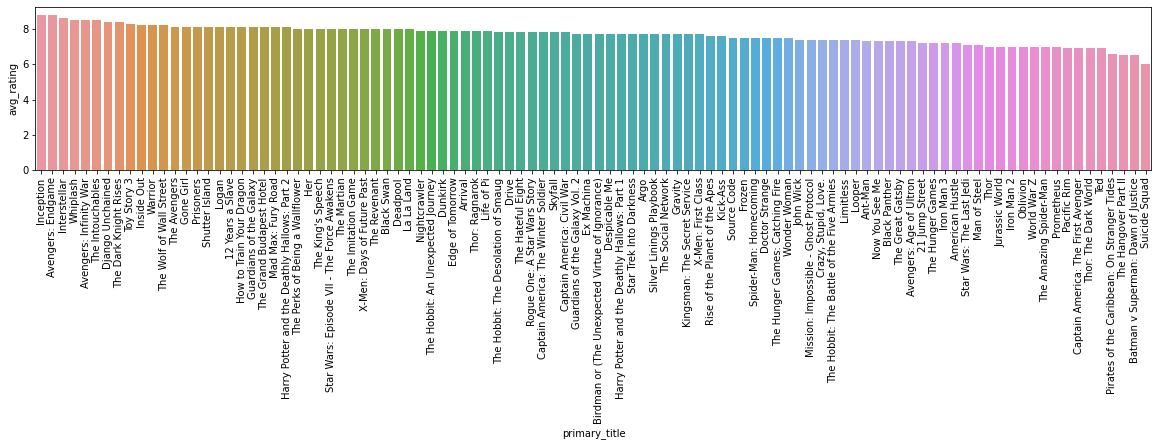

In [7]:
# bar plot for average rating of top 100 movies 
plt.figure(figsize = (20,3))
plt.xticks(rotation = 90)
sns.barplot(x=top_100_movies.primary_title, y=top_100_movies.avg_rating);

In [8]:
# merge movie directors with top 100 movies
top_movie_dir = pd.merge(top_100_movies, directors, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_movie_dir = pd.merge(top_movie_dir, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_movie_dir = top_movie_dir.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_movie_dir.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
2,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
3,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
4,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan


In [9]:
# count of directors in top 100 movies
top_directors = top_movie_dir.primary_name.value_counts()
top_directors.head()

Joe Russo         30
Anthony Russo     30
James Gunn        24
Matthew Vaughn    16
Peter Jackson     15
Name: primary_name, dtype: int64

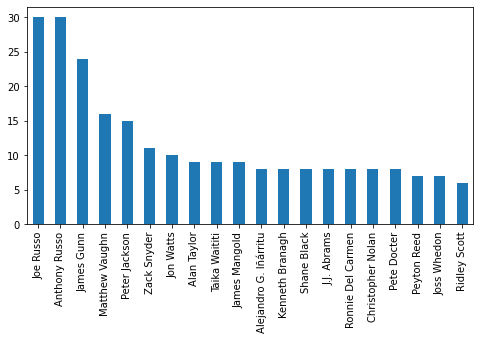

In [10]:
# bar plot of 20 top directors based on count in top 100 movies
top_directors.head(20).plot(kind='bar', figsize=(8, 4));

In [11]:
# merge movie writers with top 100 movies
top_writers = pd.merge(top_100_movies, writers, how="inner", on='movie_id')
# merge persons with top movie directors to get director names
top_writers = pd.merge(top_writers, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_writers = top_writers.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title'])
top_writers.head()

,movie_id,primary_title,avg_rating,num_votes,person_id,primary_name
0,tt1375666,Inception,8.8,1841066,nm0634240,Christopher Nolan
1,tt0816692,Interstellar,8.6,1299334,nm0634240,Christopher Nolan
2,tt1345836,The Dark Knight Rises,8.4,1387769,nm0634240,Christopher Nolan
3,tt5013056,Dunkirk,7.9,466580,nm0634240,Christopher Nolan
4,tt0770828,Man of Steel,7.1,647288,nm0634240,Christopher Nolan


In [12]:
# count of directors in top 100 movies
top_writers = top_writers.primary_name.value_counts()
top_writers.head()

Jack Kirby            21
Stan Lee              18
Stephen McFeely       10
Christopher Markus    10
Larry Lieber           9
Name: primary_name, dtype: int64

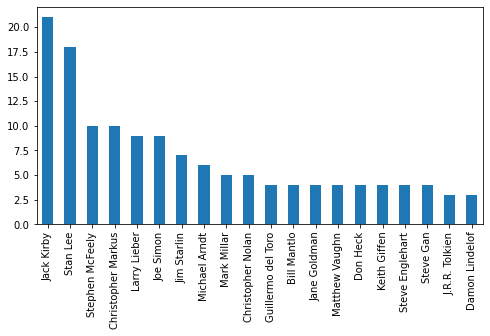

In [13]:
# bar plot of 20 top writers based on count in top 100 movies
top_writers.head(20).plot(kind='bar', figsize=(8, 4));

In [14]:
# merge movie principals with top 100 movies
top_principals= pd.merge(top_100_movies, principals, how="inner", on='movie_id')
# merge persons with top principals table to get principal names
top_principals = pd.merge(top_principals, persons, how="inner", on='person_id')
# drop irrelevant columns for readibility
top_principals = top_principals.drop(columns=['primary_profession', 'death_year', 'birth_year', 'genres', 'runtime_minutes', 'start_year', 'original_title', 'job', 'characters'])

In [15]:
# filter top principals to get top principal actors
top_principal_actors = top_principals[top_principals.category == 'actor']
top_principal_actors.head()

,movie_id,primary_title,avg_rating,num_votes,ordering,person_id,category,primary_name
1,tt1375666,Inception,8.8,1841066,1,nm0000138,actor,Leonardo DiCaprio
2,tt1853728,Django Unchained,8.4,1211405,3,nm0000138,actor,Leonardo DiCaprio
3,tt0993846,The Wolf of Wall Street,8.2,1035358,1,nm0000138,actor,Leonardo DiCaprio
4,tt1130884,Shutter Island,8.1,1005960,1,nm0000138,actor,Leonardo DiCaprio
5,tt1663202,The Revenant,8.0,621193,1,nm0000138,actor,Leonardo DiCaprio


In [16]:
# count of principal actor appearing in top 100 movies
top_actors = top_principal_actors.primary_name.value_counts()
top_actors.head()

Robert Downey Jr.    8
Chris Evans          7
Leonardo DiCaprio    6
Chris Hemsworth      6
Mark Ruffalo         6
Name: primary_name, dtype: int64

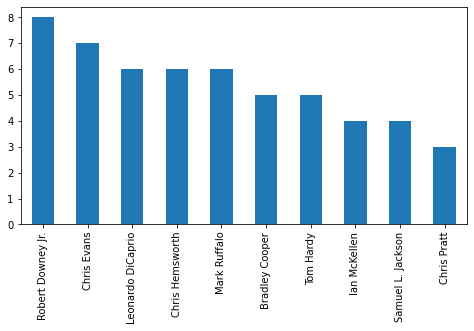

In [17]:
# bar plot of top 10 actors based on number of times they appear in the top 100 movies
top_actors.head(10).plot(kind='bar', figsize=(8, 4));

In [18]:
string_split = top_100_movies

In [19]:
# splitting genre values into new columns
genre_split = string_split["genres"].str.split(",", n = 3, expand = True)
# concatination genre columns into 1 series
top_100_movies_genres = pd.concat([genre_split[0], genre_split[1], genre_split[2]])
# drop na from genre series
top_100_movies_genres = top_100_movies_genres.dropna()
# counting genre counts in top 100 movie list
top_genre_counts = top_100_movies_genres.value_counts()
top_genre_counts

Adventure    57
Action       54
Sci-Fi       36
Drama        36
Comedy       20
Fantasy      16
Thriller     13
Mystery      11
Crime        11
Biography     8
Animation     5
Romance       4
History       3
Family        2
Music         2
Western       1
Horror        1
Sport         1
dtype: int64

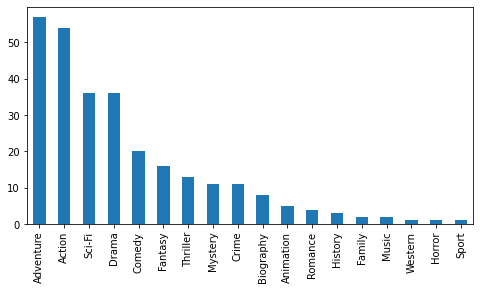

In [20]:
# bar plot of top genre counts from top 100 movies
top_genre_counts.plot(kind='bar', figsize=(8, 4));

## Runtime Statistical Analysis

In [21]:
# list of total_runtimes
runtimes = movie_info.runtime_minutes
runtimes.dropna(inplace=True)

In [22]:
#runtimes sorted in descending order
runtimes.sort_values(ascending = False).head()

70280    51420.0
27683    14400.0
15171     1440.0
71441     1100.0
72424      808.0
Name: runtime_minutes, dtype: float64

In [23]:
# Total movies mean runtime
total_mean_runtime = runtimes.mean()
total_mean_runtime

94.6540400990398

In [24]:
# top 100 runtimes
top_100_rt = top_100_movies.runtime_minutes
top_100_rt.dropna(inplace=True)

In [25]:
# top 100 mean runtimes
top_100_mean_rt = top_100_rt.mean()
top_100_mean_rt

127.99

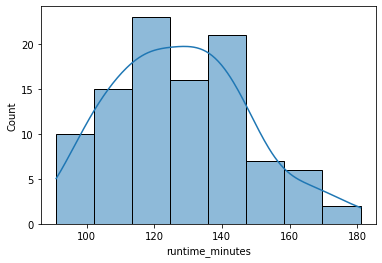

In [26]:
top_100_rt_hist = sns.histplot(top_100_rt, kde=True)
top_100_rt_hist;

In [27]:
sns.distplot

<function seaborn.distributions.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)>

In [28]:
# total_rt_hist = sns.histplot(runtimes, kde=True, bins = 50)
# total_rt_hist;

In [29]:
cleaned_movies = movie_info[(movie_info.runtime_minutes < 180) & (movie_info.runtime_minutes > 30)]
clean_movies_mean_rt = cleaned_movies.runtime_minutes.mean()
clean_movies_mean_rt

93.26160003652356

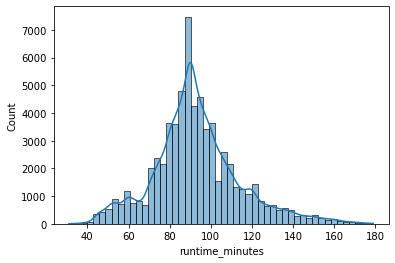

In [30]:
clean_rt_hist = sns.histplot(cleaned_movies.runtime_minutes, kde=True, bins = 50)
clean_rt_hist;

## Top Revenue Section

In [31]:
# Read in Data For Revenue Section
budgets = pd.read_csv('Files/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [32]:
# Removing dollar signs from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace('$','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('$','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('$','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


In [33]:
# Removing commas from budget columns to allow for manipulation
budgets['production_budget'] = budgets['production_budget'].str.replace(',','')
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace(',','')
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace(',','')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [34]:
#Dropping uneccesary rows
budgets = budgets.drop(columns=['id', 'release_date'])
# Rename movie row to primary_title for consistency with previous tables
budgets = budgets.rename(columns={'movie': 'primary_title'})
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,425000000,760507625,2776345279
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,Dark Phoenix,350000000,42762350,149762350
3,Avengers: Age of Ultron,330600000,459005868,1403013963
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [35]:
#Checking Data Types
budgets.dtypes

primary_title        object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [36]:
#Changing datatypes to int
budgets['production_budget'] = budgets['production_budget'].astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(float)
budgets.dtypes

primary_title         object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [37]:
#adding net revenue columns
net = budgets.worldwide_gross - budgets.production_budget
budgets['net_revenue'] = net
budgets.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,net_revenue
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [38]:
# verify info and checking for null values
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   domestic_gross     5782 non-null   float64
 3   worldwide_gross    5782 non-null   float64
 4   net_revenue        5782 non-null   float64
dtypes: float64(4), object(1)
memory usage: 226.0+ KB


In [39]:
revenue_ratings = pd.merge(budgets, movie_info, how='inner', on='primary_title')
revenue_ratings = revenue_ratings.drop(columns=['genres', 'runtime_minutes', 'start_year', 'original_title'])
revenue_ratings = revenue_ratings.rename(columns={'averagerating': 'avg_rating', 'numvotes': 'num_votes'})
revenue_ratings.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,net_revenue,movie_id,avg_rating,num_votes
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,6.1,43
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,6.6,447624
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,6.0,24451
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,7.3,665594
4,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,8.5,670926


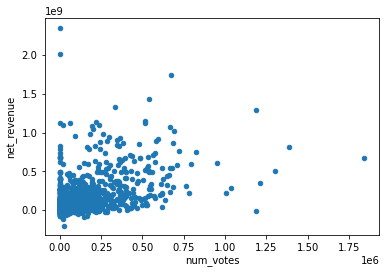

In [40]:
revenue_ratings = revenue_ratings.sort_values(by='num_votes', ascending=False)
revenue_ratings.plot(kind='scatter', x='num_votes', y='net_revenue');


In [41]:
principal_persons = pd.merge(principals, persons, how='inner', on='person_id')
budget_movie_info = pd.merge(budgets, movie_info, how='inner', on='primary_title')
principal_revenue = pd.merge(budget_movie_info, principal_persons, how='inner', on='movie_id')
principal_revenue = principal_revenue.drop(columns=['primary_profession', 'death_year', 'birth_year', 'runtime_minutes', 'start_year', 'original_title', 'job', 'characters', 'numvotes', 'averagerating'])
principal_revenue

,primary_title,production_budget,domestic_gross,worldwide_gross,net_revenue,movie_id,genres,ordering,person_id,category,primary_name
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,2,nm2603323,actress,Rikako Sakata
1,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,7,nm4392664,writer,Teruo Noguchi
2,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,1,nm1169797,actress,Ai Hashimoto
3,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,6,nm2179863,writer,Yûsuke Yamada
4,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,9,nm3328592,cinematographer,Tôru Hirao
...,...,...,...,...,...,...,...,...,...,...,...
27140,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",1,nm4572412,actress,Eva Boehnke
27141,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",2,nm4767160,actor,David Chandler
27142,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",3,nm5497357,actor,Maxwell Moody
27143,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",4,nm4766951,director,Benjamin Roberds


In [42]:
# splitting genre values into new columns
genre_split =principal_revenue["genres"].str.split(",", n = 3, expand = True)
genre_split = genre_split.rename(columns={0:'genre_1', 1:'genre_2', 2:'genre_3'})
genre_rev = pd.merge(principal_revenue, genre_split, how='left', left_index=True, right_index=True)
genre_rev = genre_rev.drop(columns='genres')
genre_1_group = genre_rev.groupby('genre_1').sum()
genre_1_net = genre_1_group.net_revenue
genre_2_group = genre_rev.groupby('genre_2').sum()
genre_2_net = genre_2_group.net_revenue
genre_3_group = genre_rev.groupby('genre_3').sum()
genre_3_net = genre_3_group.net_revenue

In [43]:
genre_net = pd.merge(genre_1_net, genre_2_net, how='inner', left_index=True, right_index=True)
genre_net = pd.merge(genre_net, genre_3_net, how='inner', left_index=True, right_index=True)

In [44]:
genre_net

,net_revenue_x,net_revenue_y,net_revenue
Animation,2.941523e+10,2.148476e+11,5.478379e+10
Biography,6.940844e+10,1.166227e+10,5.854109e+09
Comedy,1.752321e+11,8.946004e+10,2.825198e+11
Crime,4.215682e+10,6.735418e+10,2.837762e+10
Documentary,2.981924e+10,1.167862e+10,2.179672e+09
Drama,2.161413e+11,2.401102e+11,8.153097e+10
Family,2.353142e+10,5.851053e+10,7.510038e+10
Fantasy,1.837238e+10,7.815723e+10,1.545671e+11
Horror,1.062479e+11,3.831941e+10,1.594683e+10
Music,-9.635270e+07,1.491899e+10,1.870022e+10


In [45]:
genre_net['genre_net_avg'] = 0

In [46]:
genre_net_avg = ((genre_net.net_revenue_x + genre_net.net_revenue_y + genre_net.net_revenue) / 3)

In [47]:
genre_net['genre_net_avg'] = genre_net_avg

In [48]:
genre_net

,net_revenue_x,net_revenue_y,net_revenue,genre_net_avg
Animation,2.941523e+10,2.148476e+11,5.478379e+10,9.968221e+10
Biography,6.940844e+10,1.166227e+10,5.854109e+09,2.897494e+10
Comedy,1.752321e+11,8.946004e+10,2.825198e+11,1.824040e+11
Crime,4.215682e+10,6.735418e+10,2.837762e+10,4.596287e+10
Documentary,2.981924e+10,1.167862e+10,2.179672e+09,1.455917e+10
Drama,2.161413e+11,2.401102e+11,8.153097e+10,1.792608e+11
Family,2.353142e+10,5.851053e+10,7.510038e+10,5.238078e+10
Fantasy,1.837238e+10,7.815723e+10,1.545671e+11,8.369889e+10
Horror,1.062479e+11,3.831941e+10,1.594683e+10,5.350470e+10
Music,-9.635270e+07,1.491899e+10,1.870022e+10,1.117428e+10


In [50]:
genre_net = genre_net.reset_index()
genre_net = genre_net.rename(columns={'index': 'genres'} )
# genre_net

In [52]:
genre_net = genre_net.drop(columns='level_0')

In [61]:
genre_net.dtypes

genres            object
net_revenue_x    float64
net_revenue_y    float64
net_revenue      float64
genre_net_avg    float64
dtype: object

In [76]:
genre_net = genre_net.sort_values(by='genre_net_avg', ascending=False)

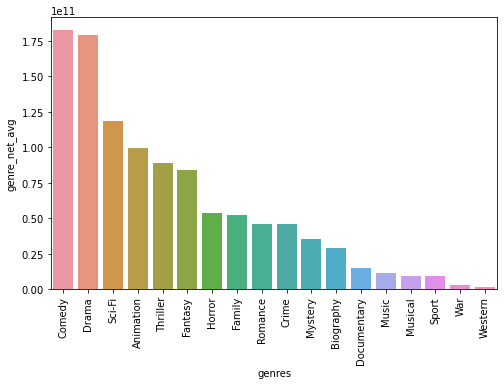

In [77]:
plt.figure(figsize = (8,5))
plt.xticks(rotation = 90)
sns.barplot(x=genre_net.genres, y=genre_net.genre_net_avg);


In [ ]:
# movies sort by most votes and avereage rating
top_net_movies = movie_info.sort_values(by=['numvotes', 'averagerating'], ascending=False)
# top 100 movies selected
top_100_net = top_movies.iloc[:100]
# top 100 movies sorted specifically by movie rating
top_100_net = top_100_movies.sort_values(by='averagerating', ascending=False)
#index reseted for top 100 movies
top_100_movies = top_100_movies.reset_index().drop(columns='index')
# select columns renamed for consistency among columns
top_100_movies = top_100_movies.rename(columns={'numvotes': 'num_votes', 'averagerating': 'avg_rating'})
top_100_movies.info()

,primary_title,production_budget,domestic_gross,worldwide_gross,net_revenue,movie_id,genres,ordering,person_id,category,primary_name
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,2,nm2603323,actress,Rikako Sakata
1,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,7,nm4392664,writer,Teruo Noguchi
2,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,1,nm1169797,actress,Ai Hashimoto
3,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,6,nm2179863,writer,Yûsuke Yamada
4,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Horror,9,nm3328592,cinematographer,Tôru Hirao
...,...,...,...,...,...,...,...,...,...,...,...
27140,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",1,nm4572412,actress,Eva Boehnke
27141,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",2,nm4767160,actor,David Chandler
27142,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",3,nm5497357,actor,Maxwell Moody
27143,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,tt2107644,"Drama,Horror,Thriller",4,nm4766951,director,Benjamin Roberds
